In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm
import sklearn.cross_validation

from matplotlib import colors
import pylab as pl

import scipy.stats as stats

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


In [34]:
df = pd.read_csv("nj_teachers_salaries_2016 copy.csv")

In [35]:
df.head()

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
0,Heckman,William,Atlantic,Atlantic City,Pennsylvania Ave School,Mathematics Grades 5 - 8,1.0,98774,Standard certificate,General ed,Traditional,Not highly qualified,13.0,13.0,13.0
1,Bird,Kelly,Atlantic,Atlantic City,Atlantic City High School,Coordinator Substance Abuse,1.0,118415,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,16.0,16.0,16.0
2,Bean,David B,Atlantic,Atlantic City,Atlantic City High School,Health & Physical Education,0.8,98774,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,13.0,13.0,15.0
3,Campo,Paula Mia,Atlantic,Atlantic City,Atlantic City High School,Resource Program In-class,1.0,66184,Standard certificate,Special ed,Alternate,Doesn't need to be highly qualified,16.0,16.0,16.0
4,Adams-meyer,Della L,Atlantic,Atlantic City,Atlantic City High School,School Psychologist,1.0,101866,Standard certificate,General ed,Traditional,Doesn't need to be highly qualified,12.0,12.0,12.0


In [36]:
df.shape

(138715, 15)

In [37]:

pd.unique(df['experience_total'])


array([13., 16., 15., 12., 38.,  4., 11.,  0., 18.,  7., 23., 10.,  3.,
        8.,  9.,  1., 32.,  6., 31., 14., 19., 21., 27., 28., 24., 22.,
       17.,  5., 30., nan, 40., 35., 39., 25., 34., 36., 20., 26.,  2.,
       44., 29., 41., 43., 37., 42., 33., 46., 50., 48., 47., 45., 54.,
       56., 53., 49., 60., 52., 58., 62., 51., 55.])



## Data Cleansing and Filtering



In [38]:
df = df.loc[df['subcategory'].isin(['Special ed'])]

In [39]:
df = df.loc[df['primary_job'].isin(['Elementary School Teacher K-5'])]

In [40]:
#df = df.loc[df['county'].isin(['Bergen'])]

In [41]:
#df = df.loc[df['experience_total'].isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])]

In [42]:
salary_data = df.fillna(0)
salary_data.head(8)

,last_name,first_name,county,district,school,primary_job,fte,salary,certificate,subcategory,teaching_route,highly_qualified,experience_district,experience_nj,experience_total
348,Gatti,Gina M,Atlantic,Atlantic City,New York Avenue School,Elementary School Teacher K-5,1.0,52107,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,1.0,1.0,1.0
355,Gehringer,Sandy,Atlantic,Atlantic City,Pennsylvania Ave School,Elementary School Teacher K-5,1.0,55378,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,3.0,3.0,3.0
416,Kha,Rena,Atlantic,Atlantic City,Uptown School Complex,Elementary School Teacher K-5,1.0,67095,Standard certificate,Special ed,Alternate,Highly qualified. Passed the Praxis/NTE,9.0,9.0,9.0
423,Robinson,Stacey,Atlantic,Atlantic City,New York Avenue School,Elementary School Teacher K-5,1.0,73792,Standard certificate,Special ed,Alternate,Highly qualified. Passed the Praxis/NTE,9.0,9.0,9.0
510,Campana,Sandy E,Atlantic,Atlantic City,Richmond Avenue School,Elementary School Teacher K-5,1.0,58811,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,7.0,7.0,7.0
638,Sanderlin,Tomeka,Atlantic,Atlantic City,Dr Martin Luther King Jr School Complex,Elementary School Teacher K-5,1.0,55696,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,3.0,3.0,3.0
755,Llerena Jr,Hugo,Atlantic,Atlantic City,Richmond Avenue School,Elementary School Teacher K-5,1.0,54218,Standard certificate,Special ed,Alternate,Highly qualified. Has gradate or undergraduate...,4.0,4.0,4.0
1138,Serino,Peter C,Atlantic,Brigantine City,Brigantine Elementary School,Elementary School Teacher K-5,1.0,92409,Standard certificate,Special ed,Traditional,Highly qualified. Passed the Praxis/NTE,31.0,31.0,31.0


In [43]:
salary_data.shape

(1500, 15)

In [44]:
salary_data.keys()

Index(['last_name', 'first_name', 'county', 'district', 'school',
       'primary_job', 'fte', 'salary', 'certificate', 'subcategory',
       'teaching_route', 'highly_qualified', 'experience_district',
       'experience_nj', 'experience_total'],
      dtype='object')

In [45]:
columns = ['last_name', 'first_name', 'county', 'district', 'school','primary_job', 'fte', 
       'certificate', 'subcategory','teaching_route', 'highly_qualified', 'experience_district',
       'experience_nj']
#remove white spaces in columns names:
salary_data.columns = salary_data.columns.str.strip()

#drop unwated columns:
salary_data.drop(columns, inplace=True, axis=1)
salary_data = salary_data[['experience_total','salary']]
salary_data.head()


,experience_total,salary
348,1.0,52107
355,3.0,55378
416,9.0,67095
423,9.0,73792
510,7.0,58811


In [46]:
salary_data.shape

(1500, 2)


### Data Preprocessing 



In [47]:

y = salary_data.iloc[:, -1].values
X = salary_data.iloc[:, :-1].values
#print(X)


In [48]:
print(y)

[52107 55378 67095 ... 45000 67126 61500]


In [49]:
from sklearn.cross_validation import train_test_split



### Splitting into train and test 


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 1)
(300, 1)
(1200,)
(300,)


In [51]:
from sklearn.linear_model import LinearRegression, Ridge

### Applying Linear Regression

In [52]:
lRegressor = LinearRegression()
lRegressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
rig = Ridge(alpha=1.0)
rig.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [54]:
pred_1 = lRegressor.predict(X_test)
pred_2 = rig.predict(X_test)

In [55]:
print("R^2 score for Linear Regression: ", lRegressor.score(X_test, y_test))

R^2 score for Linear Regression:  0.6057535644196946


In [56]:
print("R^2 score for Ridge regression: ", rig.score(X_test, y_test))

R^2 score for Ridge regression:  0.6057527630482501


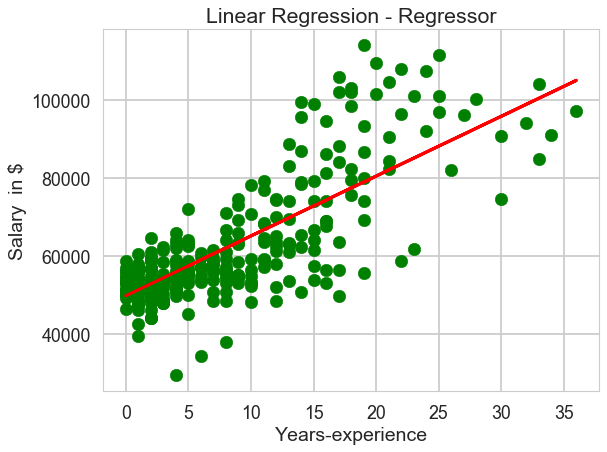

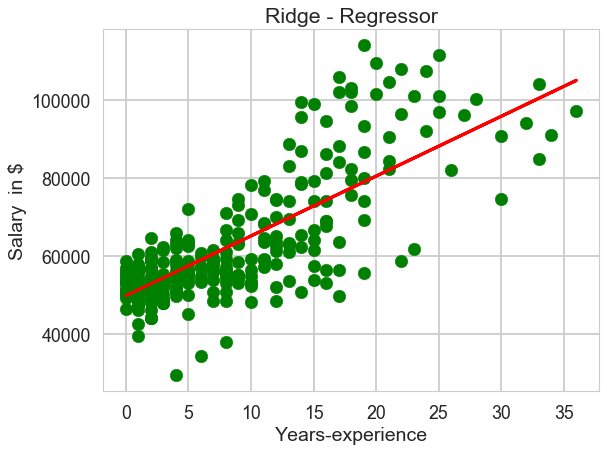

In [57]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.scatter(X_test, y_test, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_test, pred_1, c='r')
plt.title("Linear Regression - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(X_test, y_test, c='g')
#plt.scatter(X_train, y_train)
plt.plot(X_test, pred_2, c='r')
plt.title("Ridge - Regressor")
plt.xlabel("Years-experience")
plt.ylabel("Salary  in $")
plt.show()

### Calculate Coefficients, Mean Squared error and Variance score

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
# The coefficients
print('Coefficients: \n', lRegressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred_1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred_1))

Coefficients: 
 [1534.72012368]
Mean squared error: 98211371.89
Variance score: 0.61


### Try a different ratio for train_test_split

In [59]:
#Split training and testing data:
#Y = Earnings
#X = Position


import sklearn.cross_validation

sklearn.model_selection.train_test_split
X1 = salary_data.drop('salary', axis = 1)
Y1 = salary_data['salary']


X_train1, X_test1, Y_train1, Y_test1 = sklearn.cross_validation.train_test_split(X1, Y1, test_size = 0.3, random_state = 5)
print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

(1050, 1)
(450, 1)
(1050,)
(450,)


In [60]:
#Linear Regression:

from matplotlib.pyplot import figure

figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train1, Y_train1)

Y_pred_sal = lm.predict(X_test1)


<Figure size 800x640 with 0 Axes>

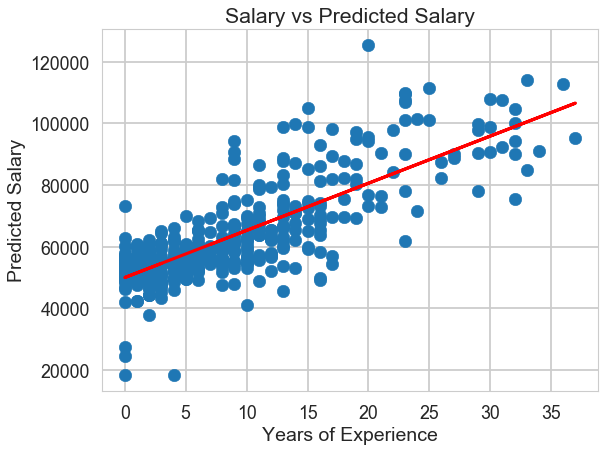

In [61]:
from matplotlib.pyplot import figure

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.scatter(X_test1, Y_test1)
plt.plot(X_test1, Y_pred_sal, c='r')


plt.xlabel("Years of Experience")
plt.ylabel("Predicted Salary")
plt.title("Salary vs Predicted Salary");


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


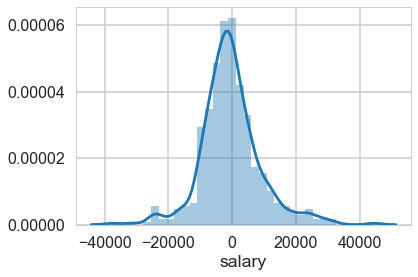

In [62]:
sns.distplot((Y_test1-Y_pred_sal))

In [63]:
from sklearn import metrics
print(metrics.mean_absolute_error(Y_test1,Y_pred_sal))

6693.0475310092925


In [64]:
print('MSE:', metrics.mean_squared_error(Y_test1, Y_pred_sal))

MSE: 88595348.48849086


In [65]:
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test1, Y_pred_sal)))

RMSE: 9412.510211866485
